Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df1=pd.get_dummies(df,columns=['job','marital','education','contact','poutcome','month'])
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [7]:
pd.set_option("display.max.columns",None)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,44,no,29,yes,no,5,151,1,-1,0,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33,no,2,yes,yes,5,76,1,-1,0,no,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,47,no,1506,yes,no,5,92,1,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,33,no,1,no,no,5,198,1,-1,0,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45207,71,no,1729,no,no,17,456,2,-1,0,yes,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45208,72,no,5715,no,no,17,1127,5,184,3,yes,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
45209,57,no,668,no,no,17,508,4,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

In [9]:
# Custom Binary Encoding of Binary o/p variables 
df1['default'] = np.where(df1['default'].str.contains("yes"), 1, 0)
df1['housing'] = np.where(df1['housing'].str.contains("yes"), 1, 0)
df1['loan'] = np.where(df1['loan'].str.contains("yes"), 1, 0)
df1['y'] = np.where(df1['y'].str.contains("yes"), 1, 0)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  bool 
 12  job_blue-collar      45211 non-null  bool 
 13  job_entrepreneur     45211 non-null  bool 
 14  job_housemaid        45211 non-null  bool 
 15  job_management       45211 non-null  bool 
 16  job_retired          4

# Building Model

In [11]:
# Dividing our data into input and output variables
x=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:]],axis=1)
y=df1.iloc[:,10]

In [12]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,5,151,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,5,76,1,-1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,5,92,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,5,198,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
45208,72,0,5715,0,0,17,1127,5,184,3,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
45209,57,0,668,0,0,17,508,4,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
log_reg=LogisticRegression()
log_reg.fit(x,y)

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# prediction of model

In [16]:
y_pred=log_reg.predict(x)

In [17]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [18]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})

In [19]:
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# model accuracy testing

In [20]:
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39037,   885],
       [ 4028,  1261]], dtype=int64)

In [21]:
(39037+1261)/(39037+885+4028+1261)

0.8913317555462166

In [22]:
log_reg.predict_proba(x)[:,1]

array([0.06551181, 0.03516582, 0.02603462, ..., 0.61827058, 0.04697642,
       0.43178775])

# ROC Curve  plotting and AUC value

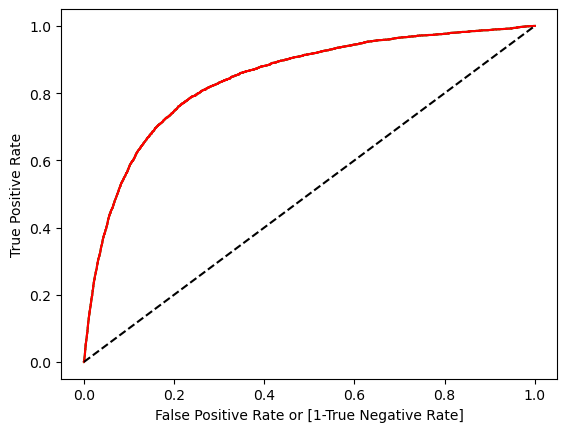

auc accuracy: 0.6081255664465541


In [23]:
fpr,tpr,threshold=roc_curve(y,log_reg.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='green')
auc=roc_auc_score(y,y_pred)
plt.plot(fpr,tpr,color='red',label='logistic model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()
print('auc accuracy:',auc)

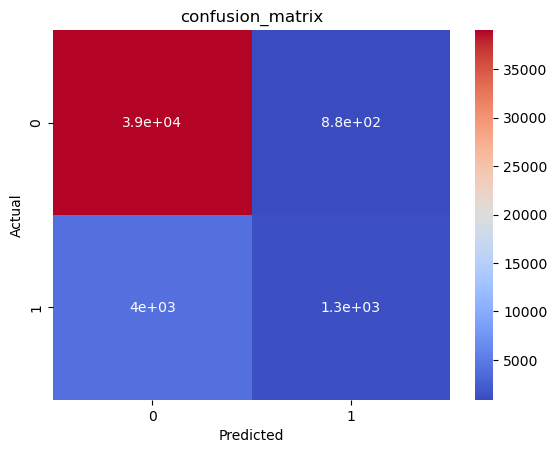

In [29]:
sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')
plt.show()